In [9]:
%matplotlib inline

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.optimizers import Adam
from keras.applications import MobileNetV2
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenetv2 import preprocess_input
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
all_files_path = '/content/drive/My Drive/colab/HWI/all'

In [0]:
classes = sorted(os.listdir(all_files_path + '/new_dataset'))

NCATS = len(classes)
batch_size = 8
iterations = 25351//batch_size//2
size = 512
channels = 3

In [0]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split = 0.2,
                            horizontal_flip=1, vertical_flip=1)

In [0]:

train_generator = datagen.flow_from_directory(
    os.path.join(all_files_path, 'new_dataset'),
    batch_size=8,
    target_size=(512,512),
    class_mode='categorical')

Found 24584 images belonging to 5005 classes.


In [0]:
сheckpoint = ModelCheckpoint(os.path.join(all_files_path, 'weights', 'humpback-{epoch:02d}-{val_acc:.4f}.hdf5'))

In [8]:
#optim = Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)
optim_2 = Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08) 

model = MobileNetV2(input_shape=(size, size, channels), alpha=1, classes=NCATS, weights=None)
model.compile(optimizer=optim_2, loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit_generator(train_generator, steps_per_epoch=iterations,
    epochs=5, validation_data=train_generator, validation_steps=50, callbacks=[сheckpoint])

Epoch 1/5
1584/1584 [==============================] - 875s 553ms/step - loss: 6.3969 - acc: 0.3761 - val_loss: 10.3981 - val_acc: 0.3375
Epoch 2/5
1584/1584 [==============================] - 861s 543ms/step - loss: 5.8862 - acc: 0.3864 - val_loss: 6.1577 - val_acc: 0.3825
Epoch 3/5
1584/1584 [==============================] - 862s 544ms/step - loss: 5.8771 - acc: 0.3754 - val_loss: 7.7538 - val_acc: 0.3775
Epoch 4/5
1584/1584 [==============================] - 864s 546ms/step - loss: 5.7040 - acc: 0.3842 - val_loss: 6.4710 - val_acc: 0.3925
Epoch 5/5
1584/1584 [==============================] - 865s 546ms/step - loss: 5.7130 - acc: 0.3771 - val_loss: 5.9219 - val_acc: 0.3500


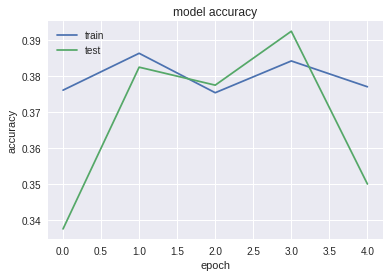

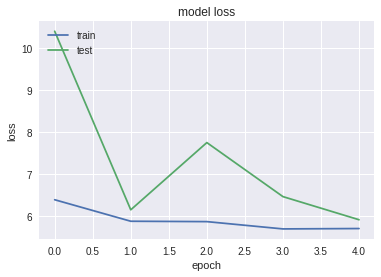

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()